<a href="https://colab.research.google.com/github/BenjaminEngel919/Prediction-of-Product-Sales/blob/main/Prediction_of_product_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction** **of** **Product** **Sales**



> **Benjamin** **Engel**





##Load and Inspect Data

In [1]:
## Import and mount drive from Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Pandas

In [2]:
## Pandas
import pandas as pd

Loading Data

In [3]:
## Define the file address as a string
sales_df = "/content/drive/MyDrive/sales_predictions.csv"
sales_predictions = pd.read_csv(sales_df)

Previewing Dataframe info and first few rows.

In [4]:
#displaying the head of the data frame
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Dataframe Information

In [5]:
#getting the data fram info
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Clean Data

# **Tasks Addressed in following code**

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

**1)How many rows and Columns?**

In [6]:
##1 -How many rows and columns?
sales_predictions.shape
print(f'There are {sales_predictions.shape[0]} rows, and {sales_predictions.shape[1]} columns.')

There are 8523 rows, and 12 columns.


**2) What are the datatypes of each variable?**

In [7]:
##2 -What are the datatypes of each variable?
sales_predictions.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**3) Any duplicates?**

In [8]:
##3Any duplicates? If yes, drop them.
print(f'There are {sales_predictions.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


**4) Identify missing values.**

In [9]:
##4 Identify missing values.
print(f'There are {sales_predictions.isna().sum().sum()} missing values.')

There are 3873 missing values.


In [10]:
#diplaying the missing values
print(sales_predictions.isna().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


**5) Decide on how to address the missing values.**

In [11]:
##5 Decide on how to address the missing values.
print(sales_predictions.isna().sum()/len(sales_predictions)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


Item_Weight is missing 17% and Outlet_Size is missing 28% I will replace weight with the median of that column. I will replace the outlet type with unknown. This is the best way to not create bias.

In [12]:
## Define the median value of the column
median_item_weight = sales_predictions['Item_Weight'].median()

In [13]:
## Replace the missing values with the column's 'median' value
sales_predictions['Item_Weight'].fillna(value = median_item_weight, inplace = True)

In [14]:
sales_predictions.fillna(value = 'Unknown', inplace=True)

**6) Confirm there are no missing values and address them!**

In [15]:
##6 Confirm there are no missing values and address them!
print(sales_predictions.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [16]:
##Verifying my replacments took place.
sales_predictions.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


**7) Find and fix any inconsistent catagories.**

In [17]:
##7 Find and fix any inconsistent catagories.

In [18]:
# finding the object colums
data_types = sales_predictions.dtypes
str_cols = data_types[ data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [19]:
for col in str_cols:
  print(f'- {col}:')
  print(sales_predictions[col].value_counts(dropna=False))
  print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

Inconsistent values are present in Item fat content. Multiple ways to say the same thing in each. No consistent data form. Will use replace to normalize the values. Two values will remain, Low Fat and Regular.

In [20]:
# Display the unique values from the column
print(sales_predictions['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [21]:
#displayig the fat content value counts
sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
## Method 2  - Use a Dictionary to replace value
sales_predictions.replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}, inplace = True)

In [23]:
## Displaying the new value totals
sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**8) For any numerical colums, obtain the summary statistics of each.**

In [24]:
##8 For any numerical columns, obtain the summary statistics of each
sales_predictions.describe(include = 'number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


##Exploratory Data Analysis

In [25]:
## Pandas
import pandas as pd
## MatPlotlib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns
# MissingNo
import missingno as msno

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Checking info again
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [27]:
##Displayig the descriptive statistics for the Item Outlet Sales column
sales_predictions['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

This shows us Item Outlet Sales numerically. We'll use visual features of Python to be describe how Sales are distrubted.

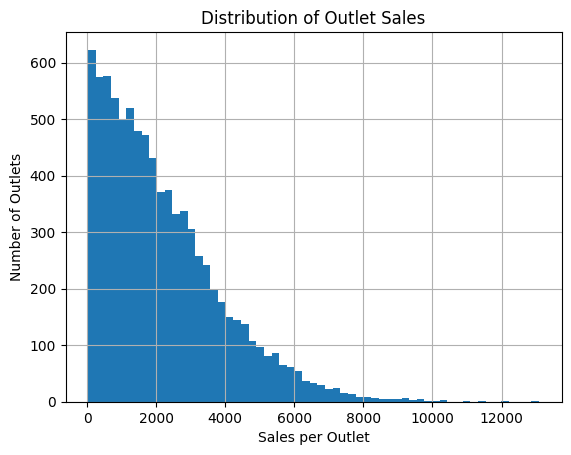

In [28]:
## Define a MatplotLib ax object using pandas' .hist()
## Bins = 'auto'
ax = sales_predictions['Item_Outlet_Sales'].hist(bins = 'auto')

## Set the Title
ax.set_title('Distribution of Outlet Sales')
## Set the X axis label
ax.set_xlabel('Sales per Outlet')
## Set the Y axis label
ax.set_ylabel('Number of Outlets');

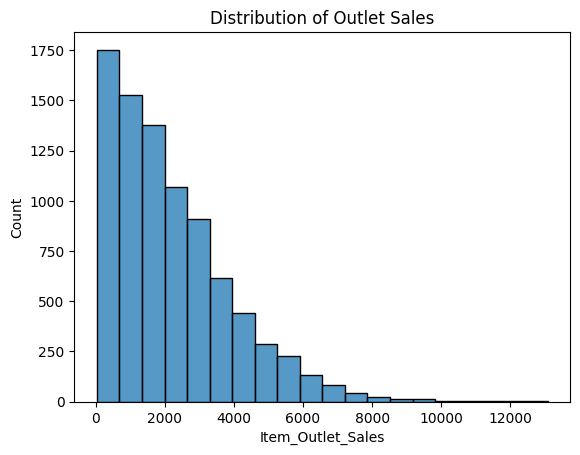

In [29]:
## Define a MatplotLib ax object using seaborn.histplot()
## Bins = 10
ax = sns.histplot(data=sales_predictions,
                  x='Item_Outlet_Sales',
                  bins=20)

## Set the Title
ax.set_title('Distribution of Outlet Sales');
## Note Seaborn automatically sets X and Y axis labels

These Histograms show that most sales figures are in the zero to $4000 range.Very few outlets have high sales. We'll use a box plot to visualize this even better.

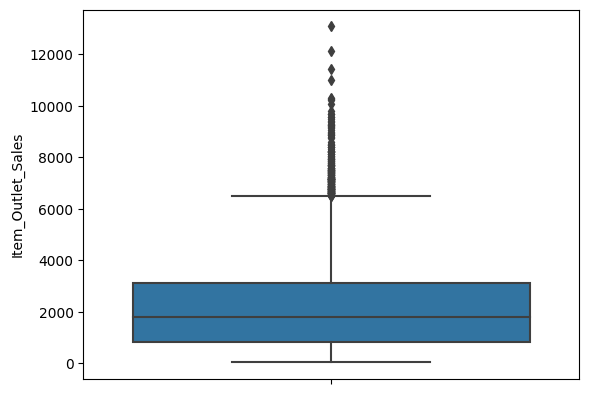

In [30]:
## Define a MatplotLib ax object using seaborn.boxplot()
## Use 'y=' for vertical
ax = sns.boxplot(y = 'Item_Outlet_Sales', data = sales_predictions)

This is better visualization that most of the Outlets make between 1k to 3k. With a mean of just under 2k. We have lots of Outlets that are overperforming greatly. Maybe we should see this by Outlet type. Let's do that.

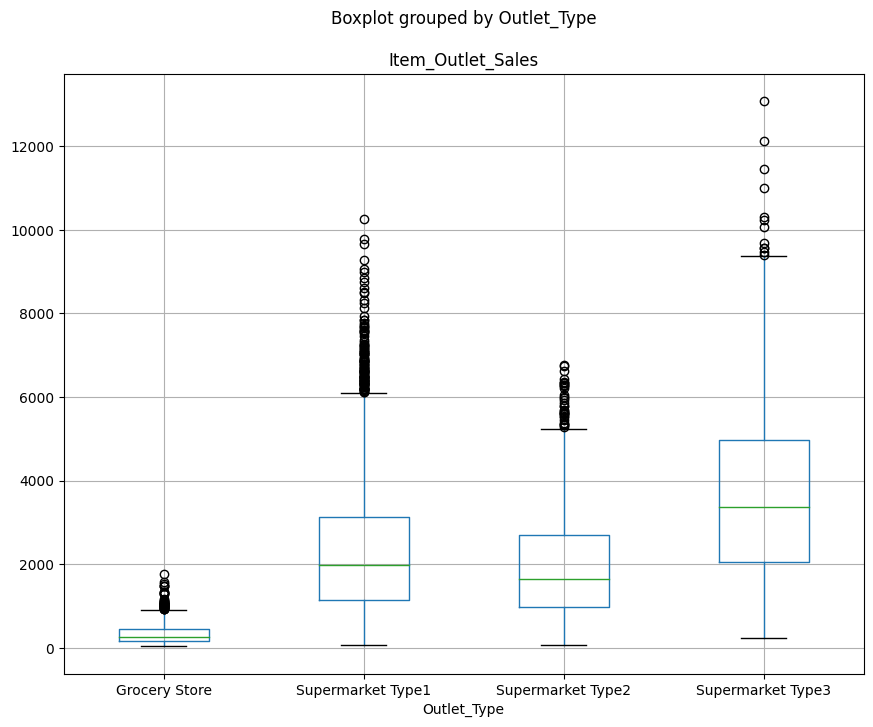

In [31]:
## Define a MatplotLib ax object using pandas' .boxplot()
## Use 'by=' to differentiate labels
ax = sales_predictions.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Type', figsize = (10,8))

Here we see that Grocery Stores are the poor performers. Barely selling except for the outliers of that type. All of the Supermarkets average at least 1750 average sales. Supermarkets also have large amount of outliers. Big money Outlets. Super market 3 averaging approximately 3500 in sales and some very high performing stores. This could definitely help decide what to build going forward.

Finally let's see if we can find a correlation numerically within out dataset.

In [32]:
#Calculating Correlations
corr = sales_predictions.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


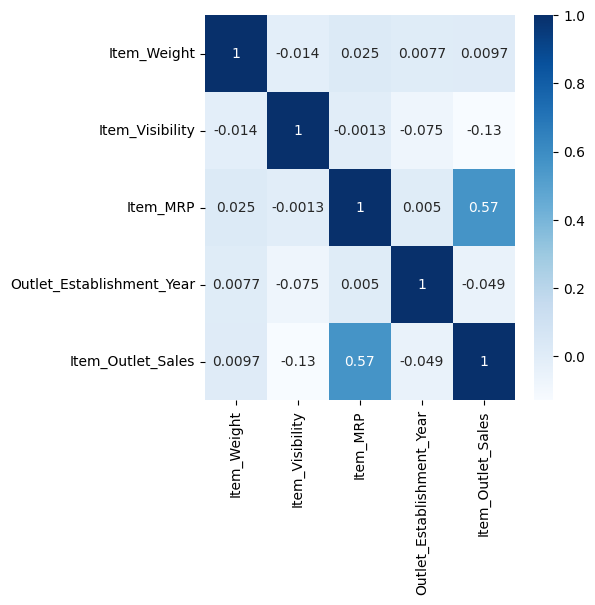

In [33]:
# Define MatplotLib fig and ax objects using plt.subplots()
# Use figsize= to set thesize of the figure
fig, ax = plt.subplots(figsize = (5, 5))

# Define a MatplotLib ax object using sns.heatmap()
# Use cmap= to define the color map
# USe annot= to annotate the correlation values
ax = sns.heatmap(corr, cmap= 'Blues', annot = True);

Based on this heatmap. The best correlation by far is that Item Outlet Sales positively increase when the Item MRP is also high. This definitely makes since, higher priced items equal higher total sales for the Outlets.

##Explanatory Data Analysis

In [34]:
#The Usual Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

In [35]:
## Updating rcParams  with the same font params that we used 
plt.rcParams.update( {'font.family':'serif',
                    'figure.figsize':[15,20],
                    'font.size':'15', #not all options for Text are options here
             'font.weight':'bold',
             'axes.titleweight': 'bold'})

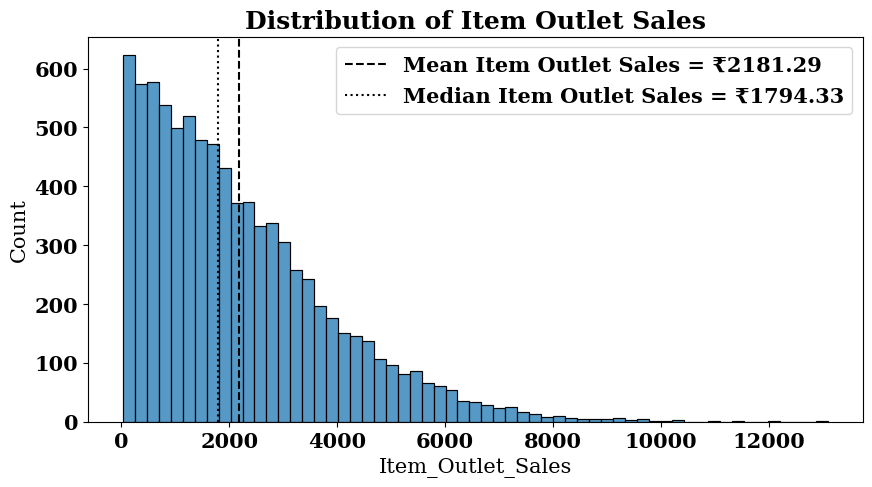

In [36]:
## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=sales_predictions, x='Item_Outlet_Sales', ax=ax)
ax.set(title='Distribution of Item Outlet Sales');

## Annotating mean and median
mean_price = sales_predictions['Item_Outlet_Sales'].mean()
ax.axvline(mean_price,color='k', ls='--', 
           label=f"Mean Item Outlet Sales = ₹{round(mean_price,2)}");

med_price = sales_predictions['Item_Outlet_Sales'].median()
ax.axvline(med_price,color='k', ls=':', 
           label=f"Median Item Outlet Sales = ₹{round(med_price,2)}");

ax.legend();

#**Discussion**

> **This visualization shows the same distribution as previous histograms but I added the Mean and Median Item Outlet Sales. This shows that the Mean is not skewed too much with the High preforming stores. It gives a good overall picture of Company production via sales.**







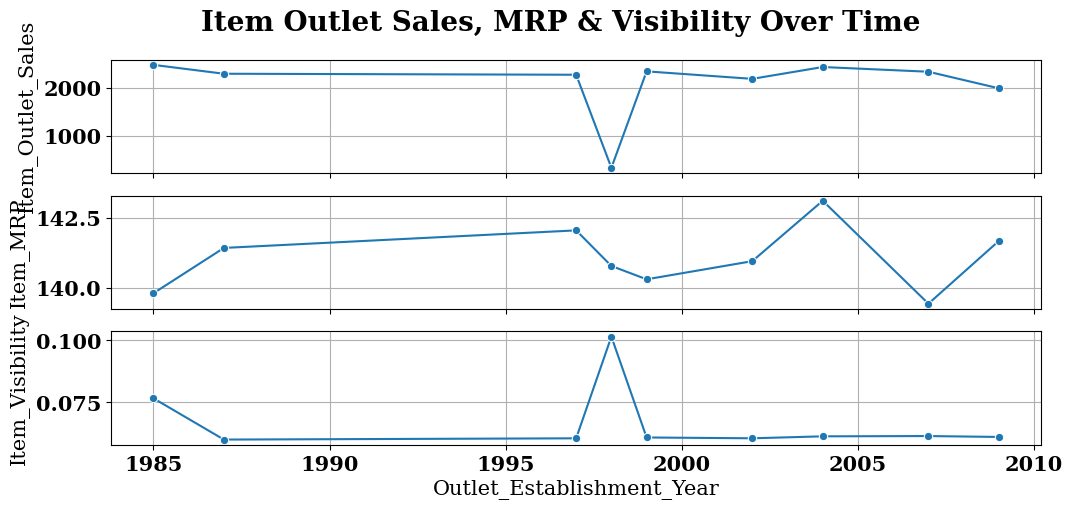

In [37]:
## Define MatplotLib fig and ax objects using plt.subplots()
fig, axes = plt.subplots(nrows = 3, figsize = (12,5), sharex = True)

sns.lineplot(data = sales_predictions, x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', errorbar = None, marker = 'o', ax = axes[0])
sns.lineplot(data = sales_predictions, x = 'Outlet_Establishment_Year', y = 'Item_MRP', errorbar = None, marker = 'o', ax = axes[1])
sns.lineplot(data = sales_predictions, x = 'Outlet_Establishment_Year', y = 'Item_Visibility', errorbar = None, marker = 'o', ax = axes[2])

# list comprehension
[ax.grid() for ax in axes]

## Set the Suptitle
fig.suptitle('Item Outlet Sales, MRP & Visibility Over Time', fontsize = 20, fontweight = 'bold');

In [38]:
plot_df = sales_predictions.groupby('Outlet_Establishment_Year').mean()

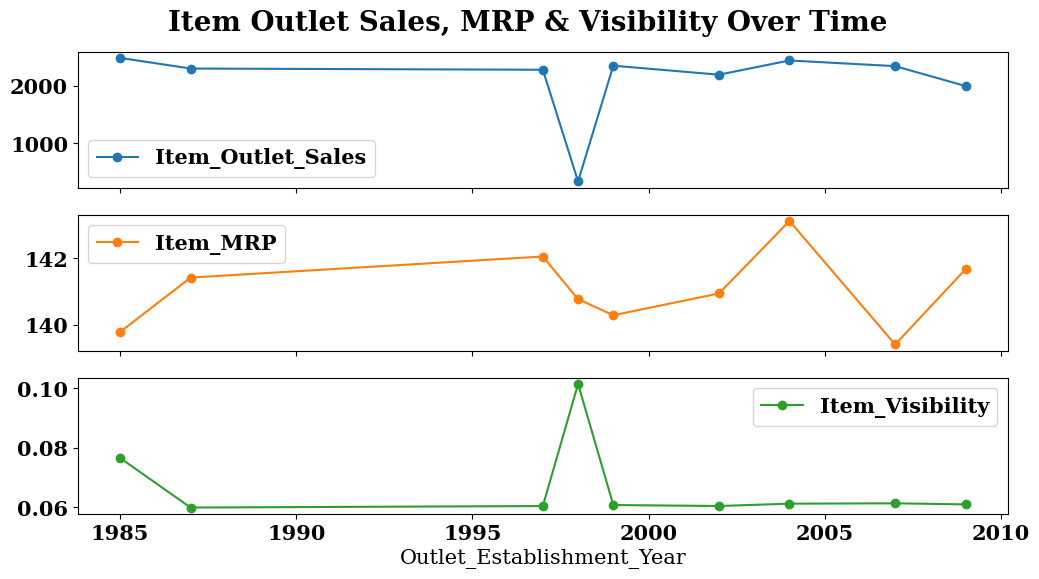

In [39]:
plot_df.plot(y=['Item_Outlet_Sales', 'Item_MRP', 'Item_Visibility'], subplots = True, marker = 'o', figsize = (12,6))

## Set the Suptitle
plt.suptitle('Item Outlet Sales, MRP & Visibility Over Time', fontsize = 20, fontweight = 'bold', y = .95);

#**Discussion**

> **These pair of three comparison lineplots shows something very interesting. Item Outlet sales and Item visibility are correlated almost perfectly. When the the Item Visibility *increased* the most the Item Outlet Sales *decreased* almost the same amount. This happened at the same moment in the timeline. This woiuld be very valueable for the shareholders and decision makers for the company.**



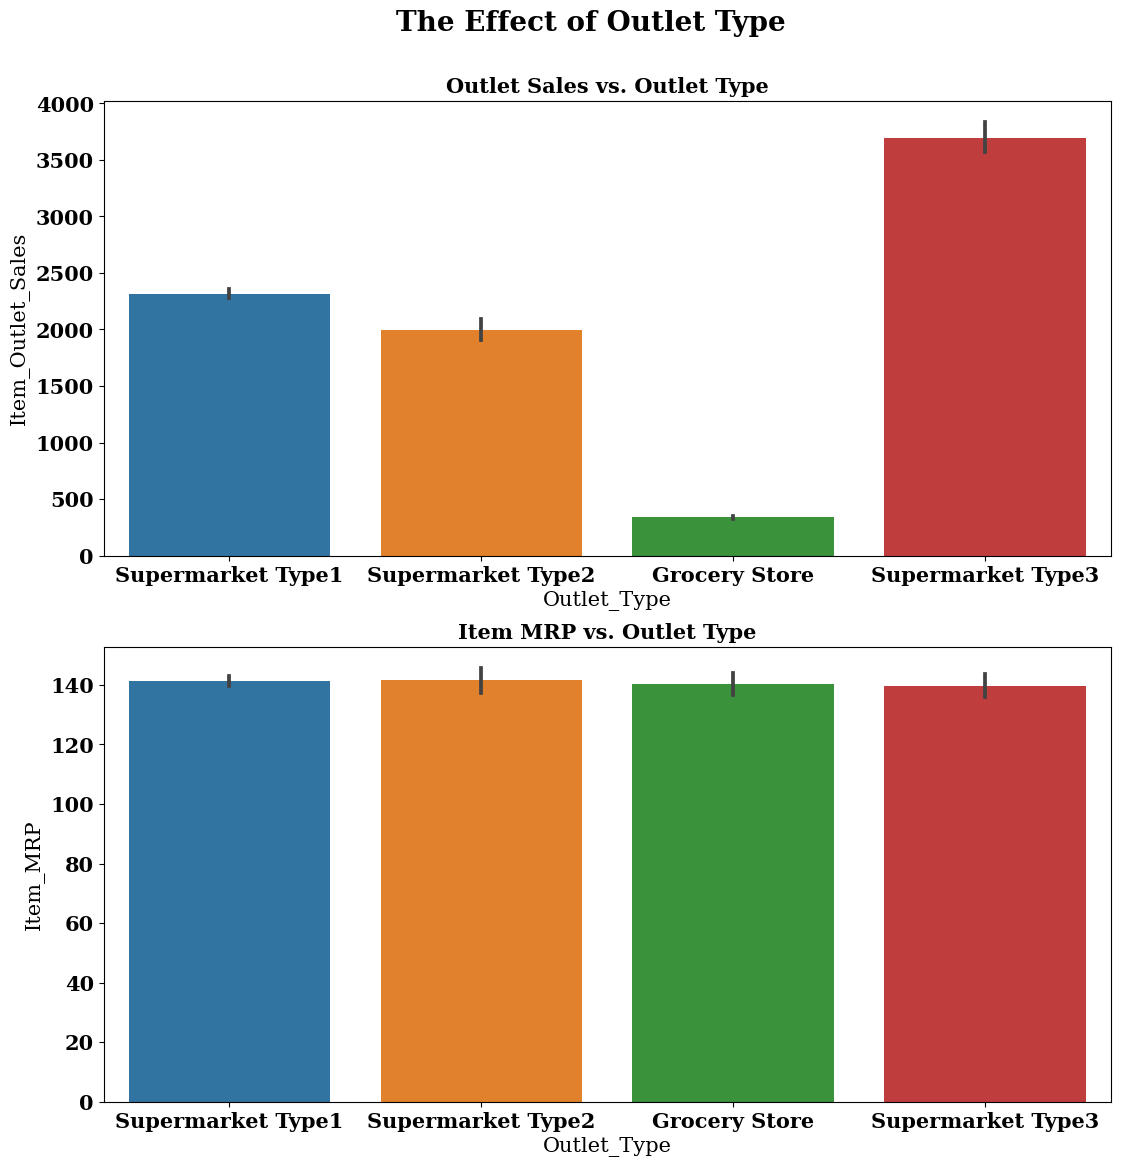

In [40]:
## Define MatplotLib fig and ax objects using plt.subplots()
fig, axes = plt.subplots(nrows = 2, figsize = (13, 13))

sns.barplot(data = sales_predictions, x = 'Outlet_Type', y = 'Item_Outlet_Sales', ax = axes[0])
## Set the Title
axes[0].set_title('Outlet Sales vs. Outlet Type', fontsize = 15, fontweight = 'bold')

sns.barplot(data = sales_predictions, x = 'Outlet_Type', y = 'Item_MRP', ax = axes[1])
## Set the Title
axes[1].set_title('Item MRP vs. Outlet Type', fontsize = 15, fontweight = 'bold')

## Set the Suptitle
fig.suptitle('The Effect of Outlet Type', fontsize = 20, fontweight = 'bold', y = .95);

#**Discussion**

> **Our final pair of Barplots tell a story that might be the best one yet. This compares Item Outlet Sales and MRP. This shows that all four Outlet types have the virtually same Item MRP but NOT the same sales. In fact Supermark Type3 has the lowest MRP by a small margin. Yet Supermarket Type3 has the largest Item Outlet Sales by far, almost doubling the runner up. This would show the shareholders which Outlet type they should consider building next. I would definitely choose Supermarket Type3.**



In [41]:
# The Usual Imports
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [42]:
# Import the data
path = '/content/drive/MyDrive/sales_predictions_2023.csv'
sales_predictions = pd.read_csv(path)
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#I will make a copy of original dataframe to avoid any manipulations 

In [43]:
copy_sales = sales_predictions.copy()

In [44]:
copy_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [45]:
copy_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##**Identify each feature**

- Pass through = none
- Ordinal features = None
- Numeric features = ['Item_Weight', 'Item_Visibility', 'Item_MRP]
- Nominal features = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type']
- Date/time features = ['Outlet_Establishment_Year']


##1a. Drop Duplicates

In [46]:
##3Any duplicates? If yes, drop them.
print(f'There are {copy_sales.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


#1b. Fix Inconsistencies in Categorical Data

In [47]:
## Define the median value of the column
median_item_weight = copy_sales['Item_Weight'].median()

In [48]:
#display object column types
data_types = copy_sales.dtypes
str_cols = data_types[ data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [49]:
for col in str_cols:
  print(f'- {col}:')
  print(copy_sales[col].value_counts(dropna=False))
  print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

In [50]:
# Display the unique values from the column
print(copy_sales['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [51]:
##Using a Dictionary to replace value
copy_sales.replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}, inplace = True)

In [52]:
## Displaying the new value totals
copy_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [53]:
# 'Outlet_Establishment_Year' is a date/time and will be included with categorical features
copy_sales['Outlet_Establishment_Year'] = copy_sales['Outlet_Establishment_Year'].astype("object")

##2. Define features (X) and target (y)

In [54]:
#Defining my Target variable which is y and the remaining features X
X = copy_sales.drop(columns = ['Item_Identifier','Item_Outlet_Sales'])
y = copy_sales['Item_Outlet_Sales']

In [55]:
copy_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#3. Train Test Split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=.30)

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4943 non-null   float64
 1   Item_Fat_Content           5966 non-null   object 
 2   Item_Visibility            5966 non-null   float64
 3   Item_Type                  5966 non-null   object 
 4   Item_MRP                   5966 non-null   float64
 5   Outlet_Identifier          5966 non-null   object 
 6   Outlet_Establishment_Year  5966 non-null   object 
 7   Outlet_Size                4276 non-null   object 
 8   Outlet_Location_Type       5966 non-null   object 
 9   Outlet_Type                5966 non-null   object 
dtypes: float64(3), object(7)
memory usage: 512.7+ KB


In [58]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2557 entries, 7503 to 3742
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                2117 non-null   float64
 1   Item_Fat_Content           2557 non-null   object 
 2   Item_Visibility            2557 non-null   float64
 3   Item_Type                  2557 non-null   object 
 4   Item_MRP                   2557 non-null   float64
 5   Outlet_Identifier          2557 non-null   object 
 6   Outlet_Establishment_Year  2557 non-null   object 
 7   Outlet_Size                1837 non-null   object 
 8   Outlet_Location_Type       2557 non-null   object 
 9   Outlet_Type                2557 non-null   object 
dtypes: float64(3), object(7)
memory usage: 219.7+ KB


#4. Instantiate Column Selectors

In [59]:
#Column Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [60]:
#Object columns
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [61]:
#number columns
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP']

#5a. Instantiate Transformers

In [62]:
#Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')
#Scaler
scaler = StandardScaler()
#One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

#5b. Instantiate Pipelines

In [63]:
#Numeric pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [64]:
#Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

#5c. Instantiate Column Transformer

In [65]:
#Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

#ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough', verbose_feature_names_out=False)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9e816f3190>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9e816f2ef0>)],
                  verbose_feature_names_out=False)

#**Fit and Transform Data**

In [66]:
#Fit on Train data
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9e816f3190>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9e816f2ef0>)],
                  verbose_feature_names_out=False)

In [67]:
#feature names
preprocessor.fit(X_train).get_feature_names_out()

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishme

In [68]:
# Transform Train and Test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [69]:
# Display the datatype of X_train_scaled
type(X_train_processed)

numpy.ndarray

In [70]:
X_train_processed

array([[-1.22586739,  1.6066808 , -0.40189546, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.62771899, -1.00844167, -0.61928426, ...,  1.        ,
         0.        ,  0.        ],
       [-0.05644255, -0.22706823, -0.20253536, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.11772641, -0.91757329,  1.5257291 , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.77004251, -0.22428724, -0.3811361 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.8212191 , -0.95575131, -0.73573148, ...,  1.        ,
         0.        ,  0.        ]])

#**Convert Preprocessed Array to Dataframes**

In [71]:
# Create dataframes from the processed arrays
# Default X_train and X_test
cols = preprocessor.fit(X_train).get_feature_names_out()

X_train_processed_df = pd.DataFrame(X_train_processed, 
                          columns = cols,
                          index = X_train.index)

#**Inspect the Result**

In [72]:
#Check for missing values and that data is scaled and one-hot encoded#print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_train_processed).sum().sum(), 'Missing Values in Training Data.')
print('\n')
print('All Data in X_train_processed are', X_train_processed.dtype)
print('\n')
print('Shape of Data is', X_train_processed.shape)
print('\n')
#Check the data types
print(f'\nThe datatypes are {X_train_processed_df.dtypes}')
X_train_processed

0 Missing Values in Training Data.


All Data in X_train_processed are float64


Shape of Data is (5966, 50)



The datatypes are Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Item_Fat_Content_Low Fat           float64
Item_Fat_Content_Regular           float64
Item_Type_Baking Goods             float64
Item_Type_Breads                   float64
Item_Type_Breakfast                float64
Item_Type_Canned                   float64
Item_Type_Dairy                    float64
Item_Type_Frozen Foods             float64
Item_Type_Fruits and Vegetables    float64
Item_Type_Hard Drinks              float64
Item_Type_Health and Hygiene       float64
Item_Type_Household                float64
Item_Type_Meat                     float64
Item_Type_Others                   float64
Item_Type_Seafood                  float64
Item_Type_Snack Foods              float64
Item_Type_Soft Drinks              float64
Item_Type_

array([[-1.22586739,  1.6066808 , -0.40189546, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.62771899, -1.00844167, -0.61928426, ...,  1.        ,
         0.        ,  0.        ],
       [-0.05644255, -0.22706823, -0.20253536, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.11772641, -0.91757329,  1.5257291 , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.77004251, -0.22428724, -0.3811361 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.8212191 , -0.95575131, -0.73573148, ...,  1.        ,
         0.        ,  0.        ]])

In [73]:
#View the transformations
X_train_processed_df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,...,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00
mean,0.00,-0.00,0.00,0.65,0.35,0.07,0.03,0.01,0.08,0.08,...,0.11,0.61,0.28,0.28,0.33,0.40,0.12,0.65,0.11,0.11
std,1.00,1.00,1.00,0.48,0.48,0.26,0.16,0.12,0.26,0.27,...,0.31,0.49,0.45,0.45,0.47,0.49,0.33,0.48,0.31,0.32
min,-1.98,-1.29,-1.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.80,-0.76,-0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.06,-0.23,0.03,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.76,0.56,0.72,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00
max,2.01,5.14,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [74]:
# The Usual Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
#Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
##Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
##Set Global scikit-learn configuration
from sklearn import set_config
##Display estimatios as a diagram
set_config(display='diagram')

#**1. Linear Regression Model**




In [75]:
#Function for metrics
def eval_regression(y_true, y_pred, name='model'):
  """Takes true targets and predictions from a regression model and prints
  MAE, MSE, RMSE, AND R2 scores
  Set 'name' to name of model and 'train' or 'test' as appropriate"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

##Baseline Model

In [76]:
## Create an instance of the model
dummy = DummyRegressor(strategy='mean')

## Create a model pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)

## Fit the model
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9e816f3190>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9e816f2ef0>)],
                                   verbose_feature_names_out=False)),
                ('dummyregressor', DummyRegressor())])

##Dummy Regressor Metrics

In [77]:
dummy_pipe.predict(X_train)

array([2204.88251968, 2204.88251968, 2204.88251968, ..., 2204.88251968,
       2204.88251968, 2204.88251968])

In [78]:
## Display model performance metrics using a function
dummy_train_preds = dummy_pipe.predict(X_train)
dummy_test_preds = dummy_pipe.predict(X_test)

eval_regression(y_train, dummy_train_preds, name='Baseline Regression Train Scores')
eval_regression(y_test, dummy_test_preds, name='Baseline Regression Test Scores')

Baseline Regression Train Scores Scores
MAE: 1,356.0957 
MSE: 2,957,434.6269 
RMSE: 1,719.7193 
R2: 0.0000

Baseline Regression Test Scores Scores
MAE: 1,338.3444 
MSE: 2,807,178.1352 
RMSE: 1,675.4636 
R2: -0.0022



#Linear Regression Model

In [79]:
# Instantiate LinearRegression
lin_reg = LinearRegression()
## Create a model pipeline
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)
# fit
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9e816f3190>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9e816f2ef0>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

##Linear Regression Metrics

In [80]:
## Display model performance metrics using a function

lin_reg_train_preds = lin_reg_pipe.predict(X_train)
lin_reg_test_preds = lin_reg_pipe.predict(X_test)

eval_regression(y_train, lin_reg_train_preds, name='Linear Regression Train')
eval_regression(y_test, lin_reg_test_preds, name='Linear Regression Test ')

Linear Regression Train Scores
MAE: 847.6890 
MSE: 1,298,674.8484 
RMSE: 1,139.5942 
R2: 0.5609

Linear Regression Test  Scores
MAE: 810.4175 
MSE: 1,210,331.7057 
RMSE: 1,100.1508 
R2: 0.5679



#**2. Decision Tree Model**

##Baseline Model

In [81]:
## Create an instance of the model
dec_tree = DecisionTreeRegressor(random_state=42)

## Create a model pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

## Fit the model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9e816f3190>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9e816f2ef0>)],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

##Tuning the Model

In [82]:
# Looking at options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [83]:
# What was the depth of our default tree?
dec_tree.get_depth()

40

In [84]:
# Let's go extreme and set our max depth to 1
dec_tree_1 = DecisionTreeRegressor(max_depth = 1, random_state = 42)
dec_tree_1.fit(X_train_processed, y_train)
train_1_score = dec_tree_1.score(X_train_processed, y_train)
test_1_score = dec_tree_1.score(X_test_processed, y_test)
print(train_1_score)
print(test_1_score)

0.23712728662523774
0.23392250927831648


In [85]:
dec_tree_35 = DecisionTreeRegressor(max_depth = 35, random_state = 42)
dec_tree_35.fit(X_train_processed, y_train)
train_35_score = dec_tree_35.score(X_train_processed, y_train)
test_35_score = dec_tree_35.score(X_test_processed, y_test)
print(train_35_score)
print(test_35_score)

0.9999870372353038
0.19280658626032654


In [86]:
depths = range(2,45)
scores = pd.DataFrame(index=depths, columns=['Train', 'Test'])

for depth in depths:
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
  dec_tree.fit(X_train_processed, y_train)
  scores.loc[depth, 'Train'] = dec_tree.score(X_train_processed, y_train)
  scores.loc[depth, 'Test'] = dec_tree.score(X_test_processed, y_test)

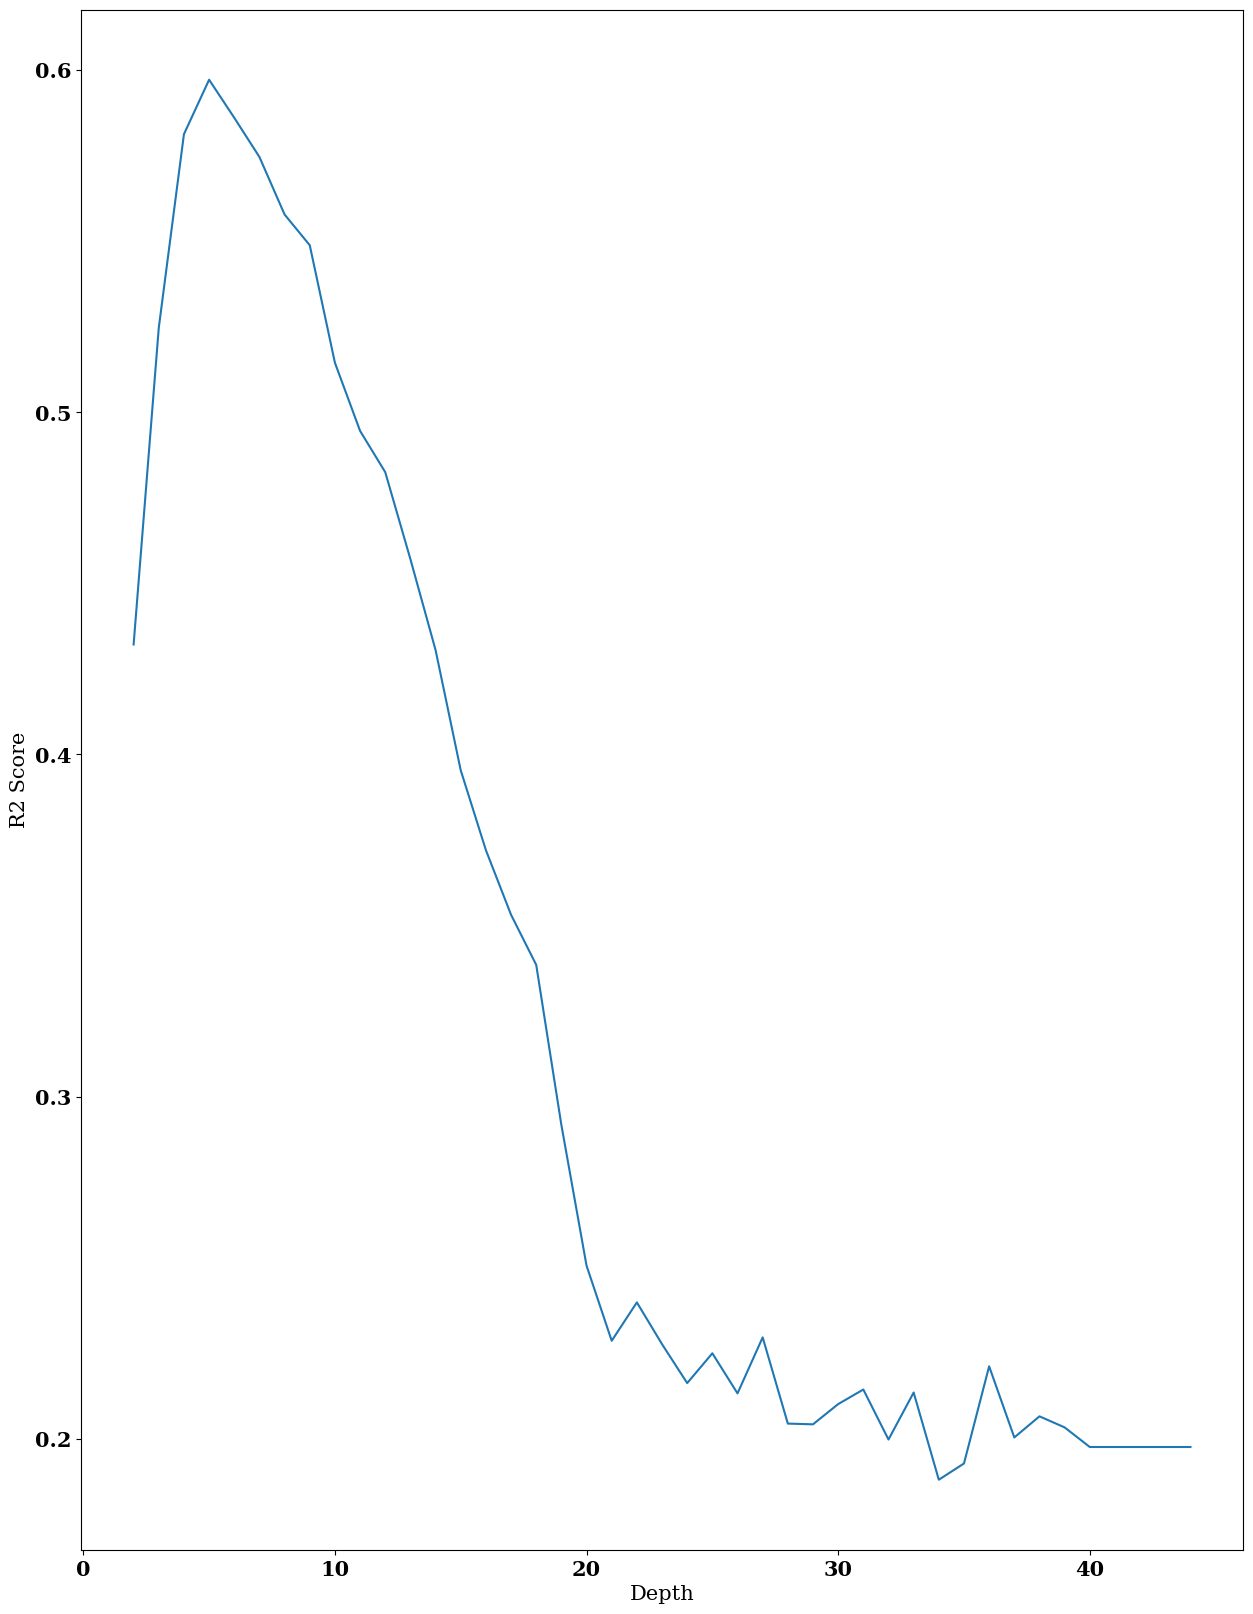

In [87]:
# Visualize which max_depth leads to the highest r2 score
plt.plot(depths, scores['Test'])
plt.xlabel('Depth')
plt.ylabel('R2 Score');

In [88]:
scores.sort_values(by='Test', ascending=False).head()

,Train,Test
5,0.604615,0.597173
6,0.616612,0.586053
4,0.583913,0.581257
7,0.627824,0.574597
8,0.647953,0.55778


In [89]:
 # Set max depth to 5
best_dec_tree = DecisionTreeRegressor(max_depth = 5, random_state = 42)
best_dec_tree.fit(X_train_processed, y_train)
best_train_score = best_dec_tree.score(X_train_processed, y_train)
best_test_score = best_dec_tree.score(X_test_processed, y_test)
print(f'Best Decision Tree Train Score: {best_train_score}')
print(f'Best Decision Tree Test Score: {best_test_score}')

Best Decision Tree Train Score: 0.6046148229310786
Best Decision Tree Test Score: 0.5971728923369279


In [90]:
## Display model performance metrics using a function

dec_train_predict = best_dec_tree.predict(X_train_processed)
dec_test_predict = best_dec_tree.predict(X_test_processed)

eval_regression(y_train, dec_train_predict, name='Tuned Decision Tree Train')
eval_regression(y_test,dec_test_predict, name='Tuned Decision Tree Test')

Tuned Decision Tree Train Scores
MAE: 760.9653 
MSE: 1,169,325.8136 
RMSE: 1,081.3537 
R2: 0.6046

Tuned Decision Tree Test Scores
MAE: 743.4843 
MSE: 1,128,316.1212 
RMSE: 1,062.2223 
R2: 0.5972



#Linear Regression Model comparison to Decision Tree Model

    -Linear Regression Train Scores
    -MAE: 847.6553 
    -MSE: 1,298,674.2664 
    -RMSE: 1,139.5939 
    -R2: 0.5609

    -Linear Regression Test  Scores
    -MAE: 810.3803 
    -MSE: 1,210,308.6412 
    -RMSE: 1,100.1403 
    -R2: 0.5679

    -Tuned Decision Tree Train Scores
    -MAE: 760.9653 
    -MSE: 1,169,325.8136 
    -RMSE: 1,081.3537 
    -R2: 0.6046

    -Tuned Decision Tree Test Scores
    -MAE: 743.4843 
    -MSE: 1,128,316.1212 
    -RMSE: 1,062.2223 
    -R2: 0.5972

#**Percentage of Error** 

In [91]:
# Calculate percentage error on Linear Regression Model
mae = mean_absolute_error(y_test, lin_reg_test_preds)
per_error = mae / copy_sales['Item_Outlet_Sales'].mean() * 100

print(f'Linear Regression Percentage Error: {per_error:.2f}%')

Linear Regression Percentage Error: 37.15%


In [92]:
#Obtaining the error percentage for Decision Tree Model
y_pred = best_dec_tree.predict(X_test_processed)
mae = mean_absolute_error(y_test, y_pred)
per_error = mae / copy_sales['Item_Outlet_Sales'].mean() * 100
print(f'Decision Tree Percentage Error: {per_error:.2f}%')

Decision Tree Percentage Error: 34.08%


#**Final Evaluation**

#**Model Recommendation, Tuned Decision Tree**
  - Tuned Decision Tree had the lowest MAE of 743.4843.  Our model was off on it's predictions by $743.48.  
  - Error percentage of 34.08%.  
  - Fairly lower error percentage on Decision Tree vs Linear Regression.
  - The Root Mean Squared Error is also slightly lower for the Decision Tree. This means that there are less outliers throwing off the weight of our model.
  - Both models had good balance. The Tuned Decision Tree once again was slightly better.